In [1]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
# Set image resize dimensions
image_size = (64, 64)

# Path to your dataset folders
dataset_path = r'D:\Street-holes-recognition\dataset'
good_path = os.path.join(dataset_path, 'good street')
holes_path = os.path.join(dataset_path, 'street with holes')


In [3]:
def load_and_flatten_images(folder_path, label, image_size):
    data = []
    for filename in os.listdir(folder_path):
        if filename.endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(folder_path, filename)
            try:
                img = Image.open(img_path).convert('RGB').resize(image_size)
                img_array = np.array(img) / 255.0  # Normalize
                img_flat = img_array.flatten()     # Flatten the image
                img_flat = list(img_flat) + [label]  # Append the label at the end
                data.append(img_flat)
            except Exception as e:
                print(f"Error processing {filename}: {e}")
    return data


In [4]:
# Load good streets (label = 0)
good_data = load_and_flatten_images(good_path, 0, image_size)

# Load streets with holes (label = 1)
holes_data = load_and_flatten_images(holes_path, 1, image_size)


In [5]:
# Combine all data
full_data = good_data + holes_data

# Convert to DataFrame
df = pd.DataFrame(full_data)

# Last column is the label
df.columns = [f'pixel_{i}' for i in range(df.shape[1] - 1)] + ['label']

# Save to CSV
df.to_csv('flattened_street_dataset.csv', index=False)

print("Dataset saved as 'flattened_street_dataset.csv'")


Dataset saved as 'flattened_street_dataset.csv'


In [6]:
flattened_street_dataset = pd.read_csv('flattened_street_dataset.csv')

In [7]:
flattened_street_dataset.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_12279,pixel_12280,pixel_12281,pixel_12282,pixel_12283,pixel_12284,pixel_12285,pixel_12286,pixel_12287,label
0,0.062745,0.078431,0.105882,0.066667,0.070588,0.098039,0.062745,0.078431,0.101961,0.062745,...,0.070588,0.066667,0.098039,0.070588,0.066667,0.098039,0.070588,0.066667,0.098039,0
1,0.564706,0.666667,0.600000,0.588235,0.686275,0.607843,0.643137,0.705882,0.627451,0.631373,...,0.172549,0.200000,0.113725,0.176471,0.200000,0.117647,0.176471,0.200000,0.117647,0
2,0.619608,0.737255,0.811765,0.588235,0.717647,0.800000,0.490196,0.662745,0.756863,0.427451,...,0.090196,0.105882,0.133333,0.082353,0.094118,0.121569,0.078431,0.090196,0.117647,0
3,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,...,0.286275,0.345098,0.384314,0.286275,0.337255,0.372549,0.294118,0.337255,0.372549,0
4,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,...,0.301961,0.352941,0.372549,0.290196,0.349020,0.368627,0.290196,0.352941,0.368627,0


In [8]:
flattened_street_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18159 entries, 0 to 18158
Columns: 12289 entries, pixel_0 to label
dtypes: float64(12288), int64(1)
memory usage: 1.7 GB


In [9]:
flattened_street_dataset.describe()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_12279,pixel_12280,pixel_12281,pixel_12282,pixel_12283,pixel_12284,pixel_12285,pixel_12286,pixel_12287,label
count,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,0.425854,0.455347,0.464557,0.437117,0.466847,0.475500,0.446928,0.477508,0.486123,0.456104,...,0.312002,0.308975,0.291421,0.304295,0.301669,0.284148,0.295830,0.293568,0.276417,0.420067
std,0.305692,0.312232,0.339146,0.301978,0.308172,0.335502,0.299426,0.304971,0.332589,0.297122,...,0.222054,0.211516,0.204066,0.222707,0.211928,0.204006,0.223756,0.213086,0.204627,0.493583
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.152941,0.176471,0.141176,0.172549,0.200000,0.160784,0.188235,0.219608,0.176471,0.207843,...,0.125490,0.141176,0.129412,0.117647,0.129412,0.117647,0.105882,0.117647,0.109804,0.000000
50%,0.411765,0.458824,0.447059,0.427451,0.470588,0.462745,0.439216,0.486275,0.478431,0.454902,...,0.290196,0.294118,0.270588,0.282353,0.282353,0.262745,0.270588,0.274510,0.250980,0.000000
75%,0.674510,0.713725,0.780392,0.682353,0.717647,0.788235,0.690196,0.729412,0.792157,0.694118,...,0.470588,0.458824,0.435294,0.466667,0.450980,0.427451,0.454902,0.447059,0.419608,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


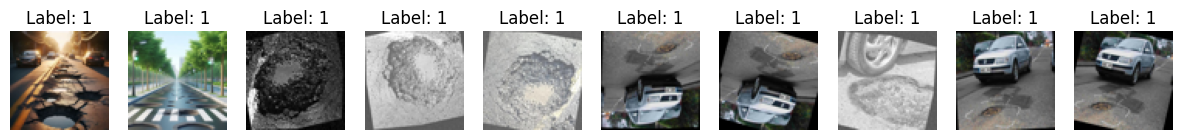

In [14]:
# show bad streets
def show_bad_streets(df, num_images=5):
    bad_streets = df[df['label'] == 1]
    plt.figure(figsize=(15, 10))
    for i in range(num_images):
        img_data = bad_streets.iloc[i, :-1].values.reshape(image_size[0], image_size[1], 3)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img_data)
        plt.title(f"Label: {bad_streets.iloc[i, -1]}")
        plt.axis('off')
    plt.show()
show_bad_streets(flattened_street_dataset, num_images=10)

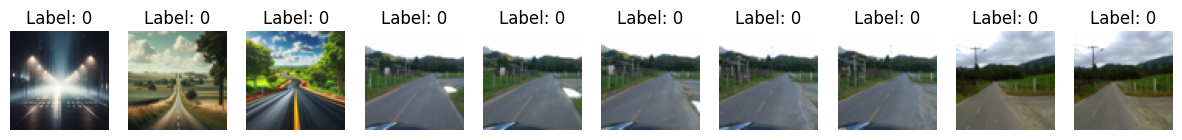

In [15]:
#show good streets
def show_good_streets(df, num_images=5):
    good_streets = df[df['label'] == 0]
    plt.figure(figsize=(15, 10))
    for i in range(num_images):
        img_data = good_streets.iloc[i, :-1].values.reshape(image_size[0], image_size[1], 3)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img_data)
        plt.title(f"Label: {good_streets.iloc[i, -1]}")
        plt.axis('off')
    plt.show()
show_good_streets(flattened_street_dataset, num_images=10)

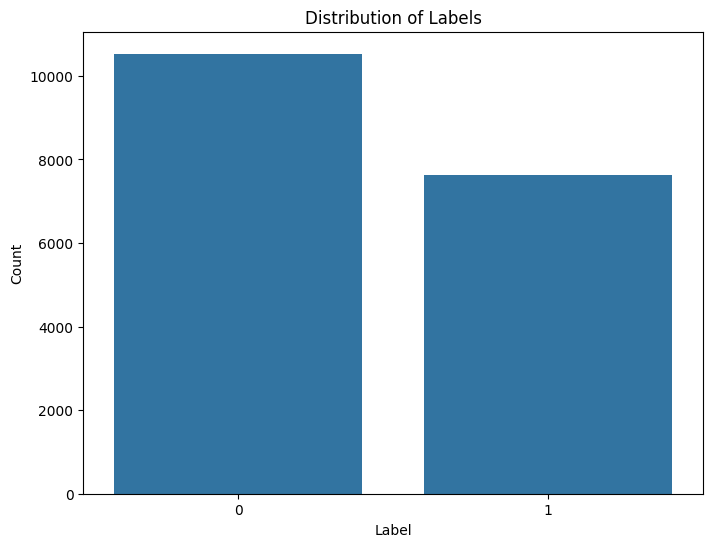

In [16]:
# Visualize the distribution of labels
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=flattened_street_dataset)
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()